# Business Sales Performance Analytics
### Data Science & Analytics – Task 1 (2026)
**By Future Interns**

## Objective
The objective of this analysis is to evaluate business sales performance using
real-world transaction data and generate actionable insights to support
data-driven decision making.


## Dataset Overview
This dataset contains transactional sales data including:
- Product identifiers
- Quantity sold
- Unit price
- Invoice date
- Country of sale

The analysis focuses on revenue, product performance, regional contribution,
and sales trends over time.


## Data Loading and Initial Inspection


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:


shop_dt = pd.read_csv(
    "D:/Future Intern/task_01/requirements/data.csv",
    encoding="latin1"
)

shop_dt.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Quality Assessment
Before analysis, the dataset was examined for missing values, duplicates,
and incorrect data types.


In [2]:
shop_dt.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
shop_dt.duplicated().sum()

np.int64(5268)

In [5]:
shop_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning and Preparation
Customer-level data was excluded due to high missing values and lack of relevance
to the current business objective. Invalid records were removed, and new features
were created for analysis.


In [6]:
shop_dt = shop_dt.drop(columns=["CustomerID"])

In [7]:
shop_dt = shop_dt.drop_duplicates()

In [8]:
shop_dt = shop_dt[(shop_dt["Quantity"] > 0) & (shop_dt["UnitPrice"] > 0)]

In [9]:
shop_dt["InvoiceDate"] = pd.to_datetime(shop_dt["InvoiceDate"])

In [10]:
shop_dt["Revenue"] = shop_dt["Quantity"] * shop_dt["UnitPrice"]

In [11]:
shop_dt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60


## Exploratory Data Analysis (EDA)
This section explores overall revenue, product performance,
regional contribution, and time-based trends.


In [12]:
total_revenue = shop_dt["Revenue"].sum()
print(total_revenue)

10642110.804


In [13]:
top_products = (
    shop_dt.groupby("StockCode")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_products)

StockCode
DOT       206248.77
22423     174156.54
23843     168469.60
85123A    104462.75
47566      99445.23
85099B     94159.81
23166      81700.92
POST       78101.88
M          77750.27
23084      66870.03
Name: Revenue, dtype: float64


In [14]:
top_countries = (
    shop_dt.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_countries)

Country
United Kingdom    9001744.094
Netherlands        285446.340
EIRE               283140.520
Germany            228678.400
France             209625.370
Australia          138453.810
Spain               61558.560
Switzerland         57067.600
Belgium             41196.340
Sweden              38367.830
Name: Revenue, dtype: float64


## Revenue Trends and Performance Visualization


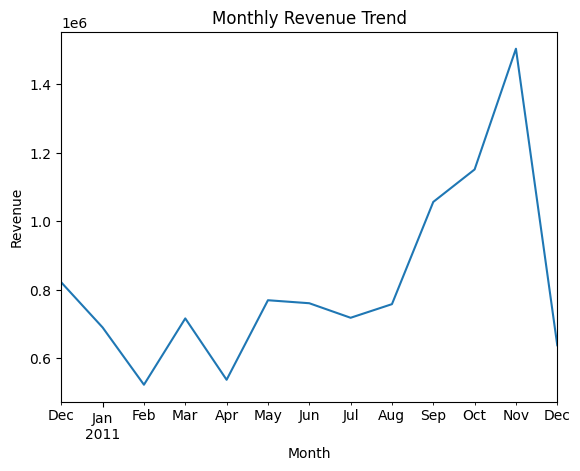

In [16]:
shop_dt["Month"] = shop_dt["InvoiceDate"].dt.to_period("M")
monthly_revenue = shop_dt.groupby("Month")["Revenue"].sum()

monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

#### **2.WHICH PRODUCTS MAKE THE MOST MONEY?**

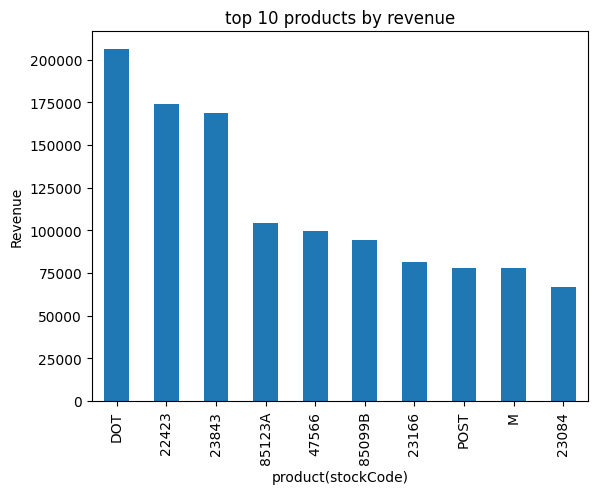

In [17]:
plt.figure()
top_products.plot(kind="bar")
plt.title("top 10 products by revenue")
plt.xlabel("product(stockCode)")
plt.ylabel("Revenue")
plt.show()

#### **Which regions generate the most revenue?**

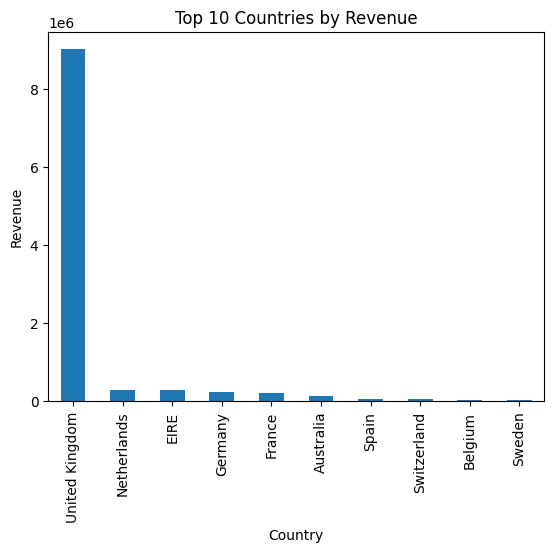

In [18]:
plt.figure()
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()


## Business Insights and Recommendations

### Key Insights
- Revenue is concentrated among a small number of products.
- A few regions contribute the majority of total sales.
- Revenue trends indicate seasonal fluctuations.

### Recommendations
- Prioritize inventory and marketing for top-performing products.
- Expand targeted campaigns in mid-performing regions.
- Align inventory planning with seasonal demand patterns.

### Conclusion
This analysis demonstrates how data-driven insights can support strategic
business decisions and reflects real-world analytics practices.


In [19]:
shop_dt.to_csv("cleaned_sales_data.csv", index=False)
